In [ ]:
#Linear Regression Model Building

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/linear_regression_dataset.csv')

In [3]:
df

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,A,Alice,371.099650
1,48.617357,64.446117,63,B,Charlie,299.184743
2,56.476885,61.820944,25,C,Bob,319.605931
3,65.230299,62.149045,56,C,Alice,348.440917
4,47.658466,41.569469,33,C,Bob,201.644393
...,...,...,...,...,...,...
200,54.967142,72.642384,62,A,Alice,371.099650
201,48.617357,64.446117,63,B,Charlie,299.184743
202,56.476885,61.820944,25,C,Bob,319.605931
203,65.230299,62.149045,56,C,Alice,348.440917


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  195 non-null    float64
 1   Feature2  197 non-null    float64
 2   Feature3  205 non-null    int64  
 3   Category  205 non-null    object 
 4   Name      205 non-null    object 
 5   Target    205 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.7+ KB


In [ ]:
# EDA
#1.null values
# 2.dupliactes
# 3.outliers
# 4.label encoding

In [5]:
df.isnull().sum()

,0
Feature1,10
Feature2,8
Feature3,0
Category,0
Name,0
Target,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
Feature1,0
Feature2,0
Feature3,0
Category,0
Name,0
Target,0


In [9]:
df.duplicated().sum()

np.int64(5)

In [ ]:
#df.drop_duplicates().sum()

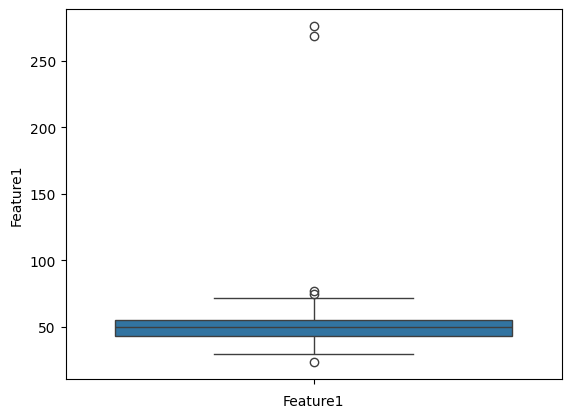

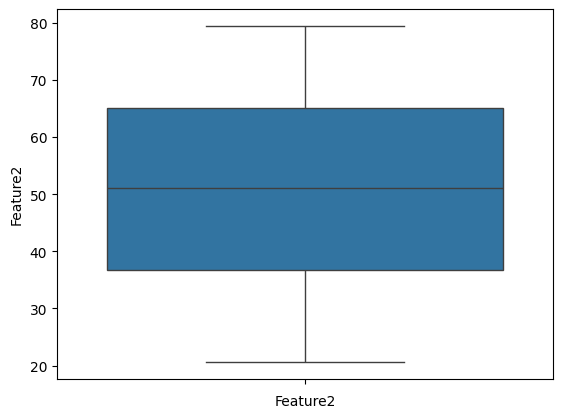

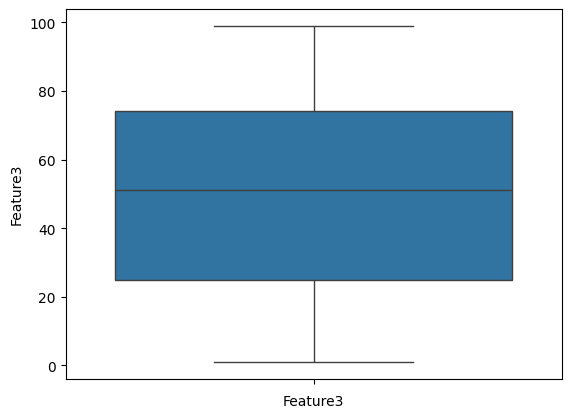

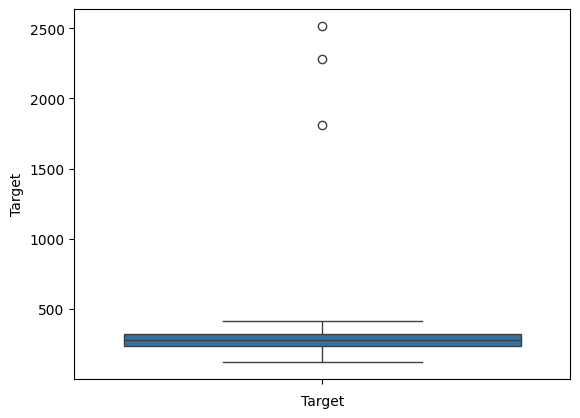

In [11]:
for col in df.columns:
  if(df[col].dtype!='object'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [12]:
df.columns

Index(['Feature1', 'Feature2', 'Feature3', 'Category', 'Name', 'Target'], dtype='object')

In [16]:
out_list=['Feature1','Feature2','Feature3','Target']
for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR= Q3 -Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
for col in df.columns:
  if(df[col].dtype=='object'):
    df[col]=le.fit_transform(df[col])

In [20]:
df

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,0,0,371.099650
1,48.617357,64.446117,63,1,2,299.184743
2,56.476885,61.820944,25,2,1,319.605931
3,65.230299,62.149045,56,2,0,348.440917
4,47.658466,41.569469,33,2,1,201.644393
...,...,...,...,...,...,...
200,54.967142,72.642384,62,0,0,371.099650
201,48.617357,64.446117,63,1,2,299.184743
202,56.476885,61.820944,25,2,1,319.605931
203,65.230299,62.149045,56,2,0,348.440917


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  180 non-null    float64
 1   Feature2  180 non-null    float64
 2   Feature3  180 non-null    int64  
 3   Category  180 non-null    int64  
 4   Name      180 non-null    int64  
 5   Target    180 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.8 KB


In [22]:
#Statement :- Based of 6 columns building a model which will predict the Target value
x=df.drop('Target',axis=1)
y=df['Target']

In [23]:
x

,Feature1,Feature2,Feature3,Category,Name
0,54.967142,72.642384,62,0,0
1,48.617357,64.446117,63,1,2
2,56.476885,61.820944,25,2,1
3,65.230299,62.149045,56,2,0
4,47.658466,41.569469,33,2,1
...,...,...,...,...,...
200,54.967142,72.642384,62,0,0
201,48.617357,64.446117,63,1,2
202,56.476885,61.820944,25,2,1
203,65.230299,62.149045,56,2,0


In [24]:
y

,Target
0,371.099650
1,299.184743
2,319.605931
3,348.440917
4,201.644393
...,...
200,371.099650
201,299.184743
202,319.605931
203,348.440917


In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [28]:
x_train

,Feature1,Feature2,Feature3,Category,Name
202,56.476885,61.820944,25,2,1
9,55.425600,74.794433,45,0,3
63,38.037934,56.703245,92,1,2
75,58.219025,25.870050,56,0,1
25,51.109226,55.449996,49,1,2
...,...,...,...,...,...
76,50.870471,49.496953,30,2,0
81,53.571126,56.951006,96,0,2
79,30.124311,46.031099,65,0,2
122,64.027943,36.922074,62,1,0


In [29]:
x_test

,Feature1,Feature2,Feature3,Category,Name
10,45.365823,50.680544,32,0,0
190,45.534850,26.671849,23,0,1
171,41.841897,62.058148,81,0,3
109,49.255541,60.980406,37,2,0
138,58.135172,50.315142,5,1,1
203,65.230299,62.149045,56,2,0
152,43.199753,37.592646,64,2,3
31,68.522782,51.334596,3,2,0
72,49.641740,71.327635,25,2,2
121,40.906125,68.208856,4,1,3


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
model_answers=model.predict(x_test)

In [36]:
model=model_answers

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(model_answers,y_test)*100  #r2_score --> its a method used to check closeness between two variables

41.34127789082642

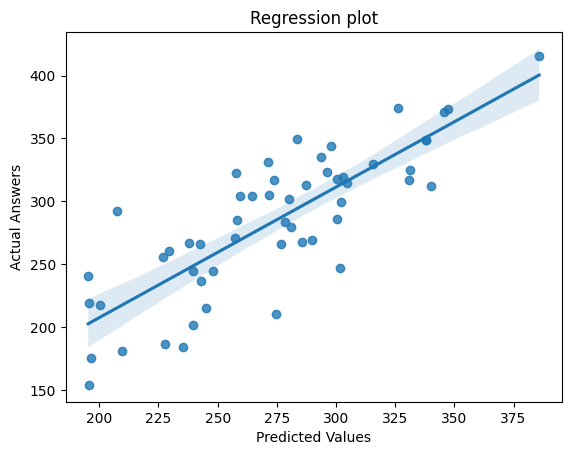

In [39]:
sns.regplot(x=model_answers,y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Answers')
plt.title("Regression plot")
plt.show()